**Regression** is a supervised learning type in which we are predicting a continous value.

Structure all machine learning projects in accordance to the **standard ML worklow**.
1. Problem formulation
2. Collecting the data
3. Exploratory Data Analysis
4. Data PreProcessing
5. Choosing and Training a model
6. Evaluating a model
7. Improving a model

#### 1. Problem formulation
Building a machine learning model that can predict the price of the house given the information about that particular house.
Taking Banglore house price dataset from kaggle

- https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
- https://www.kaggle.com/datasets/sangarshanan/bangalore-apartments-dataset/code?select=blore_apartment_data.csv&group=owned


##### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
        
import urllib.request 
from sklearn.linear_model import LinearRegression

#### 2. Collecting Data

In [2]:
# Loading the data
df1 = pd.read_csv('bangalore_housing.csv')
df1.head()

,Name of the place,BHK,Buildup Area (sq.ft),Price (Cr.)
0,"Thirumagondanahalli,Bangalore",2,2032,0.7
1,"LIC nivas,Nanja Reddy Colony, Jeevanbheemanaga...",3,1400,1.5
2,"Srinagar, Banashankari,Bangalore",2,2000,2.6
3,"Kadugodi, Krishnarajapura,Bangalore",3,1000,0.7
4,"Yelahanka,Bangalore",5,4000,6.6


In [127]:
df1.isnull().sum()

Name of the place       0
BHK                     0
Buildup Area (sq.ft)    0
Price (Cr.)             0
dtype: int64

#### 3.EDA

In [130]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4020.0,4.891294,2.450987,2.0,3.0,4.0,5.0,10.0
Buildup Area (sq.ft),4020.0,3729.375373,2621.286305,600.0,1500.0,3500.0,4800.0,12321.0
Price (Cr.),4020.0,2.792326,2.183912,0.7,1.1,2.0,3.5,40.0


In [134]:
df1_copy= df1.copy()
df1_copy= df1_copy.drop('Name of the place', axis=1)
correlation = df1_copy.corr()
correlation['Price (Cr.)']

BHK                     0.412596
Buildup Area (sq.ft)    0.764843
Price (Cr.)             1.000000
Name: Price (Cr.), dtype: float64

<Axes: >

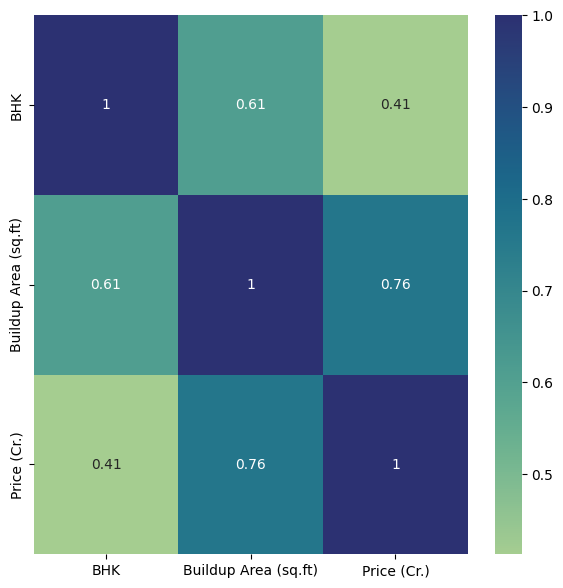

In [136]:
#### Visualizing correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest')

#### 4. Preprocessing

The data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

In [158]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df1_copy, test_size=0.1,random_state=20)

In [159]:
training_input_data = train_data.drop('Price (Cr.)', axis=1)
training_labels = train_data['Price (Cr.)']

In [160]:
num_feats = training_input_data.copy()

##### Missing Values

There are three options when dealing with missing values. You can:

- Remove them completely
- Fill them with different strategies such as mean, median, frequent, or constant.
- Leave them as they are. Most ML models don't appreciate missing values, and so they can't handle them but there are some models which are not affected by missing values, such as tree based algorithms. Since we are working with linear models for now, this is not an option.

##### Encoding categorical features

here are many ways to handle categorical features but in this project, we will only look at 3 techniques which are simple Python Mapping, Ordinary Encoding, and One Hot Encoding. Label and One Hot can be implemented easily in Sklearn.



##### Scaling Numerical features

For that reason, there are two most techniques to scale features:

**Normalization** where the features are scaled to values between 0 and 1. <br/>
**Standardization** where the features are rescaled to have 0 mean and unit standard deviation. When working with datasets containing outliers (such as time series), standardization is the right option in that particular case.

Both of those techniques are implemented quite easily in Sklearn, Normalization with MinMaxScaler, and standardization with StandardScaler.

In [161]:
## Normalizing numerical features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled



Whenever possible, it's very nice to create a data pipelines which can do all preprocessing at once without having to run each individual function.

#### 5. Choosing and Training a model

In [162]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [163]:
reg_model.fit(num_scaled, training_labels)

LinearRegression()

weights and bias? These are two paremeters of any typical ML model.<br/>
- each coefficient correspond to each feature, and the biases term is added as a constant.
- model = Coeff 0 Feature 0 + Coeff 1 * Feature 1 + .......Coeff 13 * Feature 13 + bias*
- The simplest form of a linear equation is y=ax+b. a stands for the coefficient/weight and b stands for intercept/bias.

In [164]:
reg_model.coef_

array([-0.58955881,  7.9654687 ])

In [165]:
reg_model.intercept_

0.8833850303083159

#### 6. Model Evaluation

There are 3 main evaluation metrics for the regression models. These are:

- Mean Squared Error (MSE)
- Root Mean Squared Error(RMSE)
- Mean Absolute Error (MAE)

RMSE is the most commonly used one.

In [167]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(num_scaled)

In [168]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

1.411778111415009

In [169]:
test_input_data=test_data.drop('Price (Cr.)', axis=1)
test_labels = test_data['Price (Cr.)']


scaled_test_data = scaler.fit_transform(test_input_data)

In [170]:
test_pred = reg_model.predict(scaled_test_data)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

1.2876991094095596

Evaluating the model on the training data using **cross validation** gaves us the rmse of 1.411 Cr but on the test data, the linear model we are using gave us 1.287 Cr

#### Struggling with Maps

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
gdf = gpd.read_file('india-districts-2019-734.json')

In [6]:
# Drop the 'B' column
gdf.drop('id', axis=1, inplace=True)
gdf

,district,dt_code,st_nm,st_code,year,geometry
0,Aizawal,261,Mizoram,15,2011_c,"POLYGON ((93.04455 23.41075, 93.03979 23.41471..."
1,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04553 23.66669, 93.04553 23..."
2,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89558 24.39134, 92.89558 24.39134..."
3,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93465 22.55455, 92.93745 22.54510..."
4,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67269 23.38265, 92.67843 23.37882..."
...,...,...,...,...,...,...
729,Pratapgarh,173,Uttar Pradesh,09,2011_c,"POLYGON ((82.04857 26.05776, 82.05333 26.05584..."
730,Bilaspur,030,Himachal Pradesh,02,2011_c,"POLYGON ((76.73056 31.58154, 76.73070 31.58141..."
731,Niwari,782,Madhya Pradesh,23,2018,"POLYGON ((78.55905 25.21267, 78.55569 25.20923..."
732,Muzaffarabad,992,Jammu and Kashmir,01,2011_c,"POLYGON ((74.14730 35.09751, 74.15206 35.09330..."


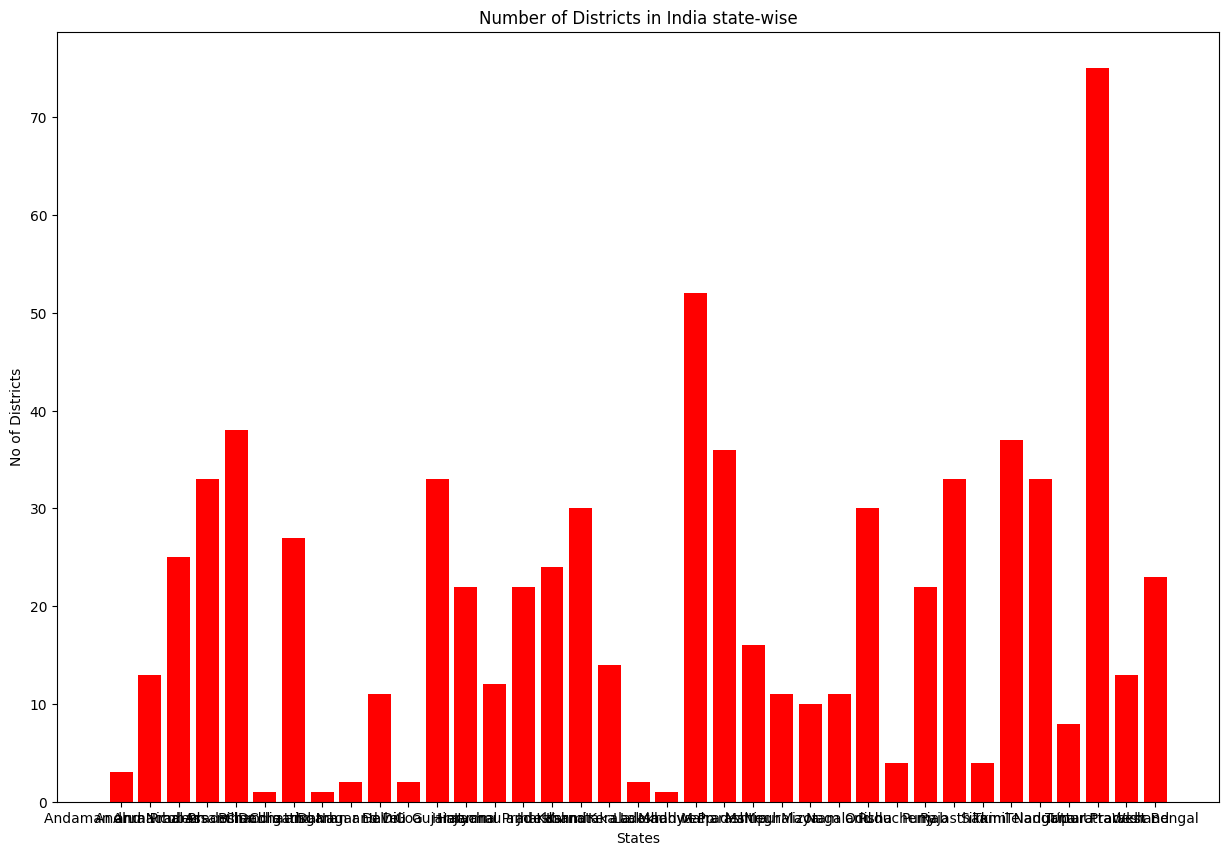

In [7]:

y_values = gdf.groupby(['st_nm']).district.count().values
y_values.tolist()

x_values = gdf.groupby(['st_nm']).district.count().index.values
x_values.tolist()

plt.figure(figsize = (15,10))
plt.bar(x_values,y_values, color = "red")
plt.xlabel("States")
plt.ylabel("No of Districts")
plt.title("Number of Districts in India state-wise")
plt.show()

In [8]:
# Reads the data of latitudes and longitudes for the districts of Assam
district_df = pd.read_csv('district wise lat and long.csv')

In [9]:
district_df = district_df[district_df.State == "Karnataka"]
#district_df.drop(['Population in 2001', 'Population in 2011'], axis='columns', inplace=True)  # removing unnecessary data


/home/godfather/Documents/Projects/PyProjects/virtenv3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


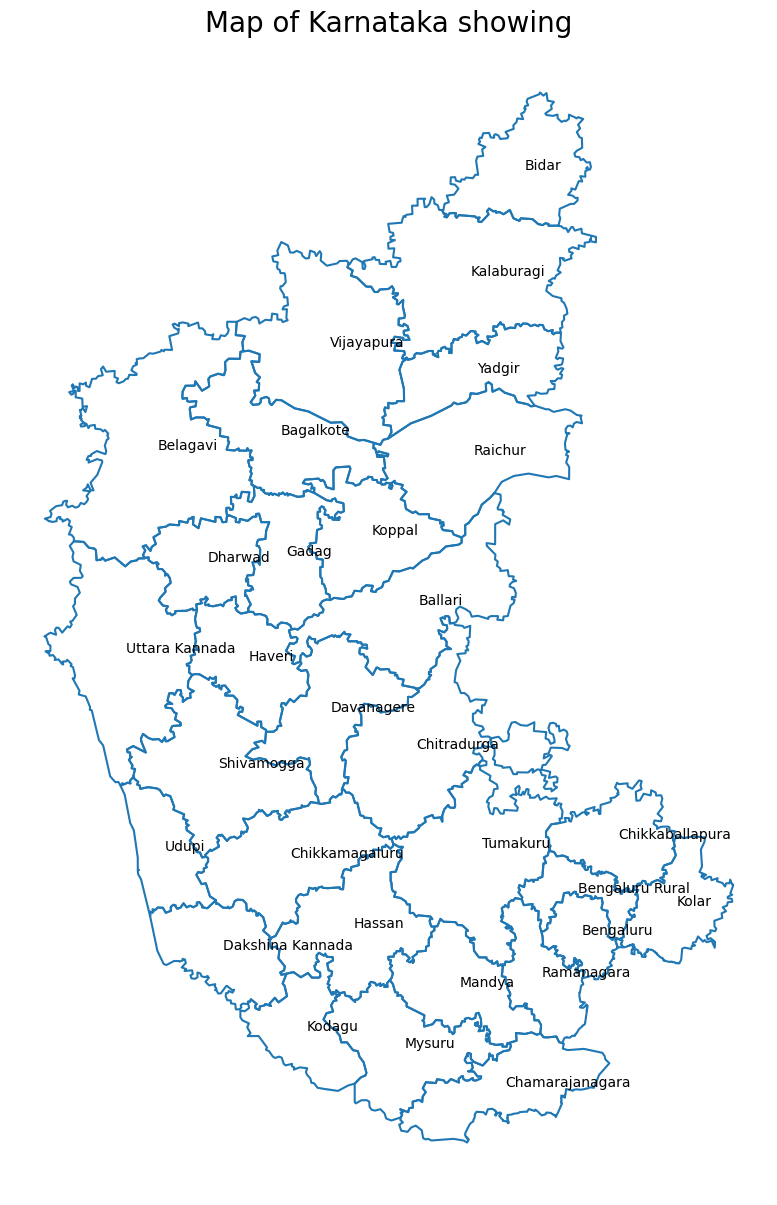

In [10]:
KA_df  = gdf[gdf.st_nm == "Karnataka"]

KA_df['centroid']=KA_df['geometry'].centroid

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(15, 15))
ax.axis('off')
ax.set_title('Map of Karnataka showing', fontdict={'fontsize': 20, 'fontweight': 10})

# Plot the boundary of Karnataka
KA_df.boundary.plot(ax=ax)
ax.set_title('Map of Karnataka showing', fontdict={'fontsize': 20, 'fontweight': 10})

# Add labels for each district
for i, row in KA_df.iterrows():
    ax.text(row['centroid'].x, row['centroid'].y, row['district'], size=10)

plt.show()

In [11]:
# Drop the 'centroid' column if you no longer need it
KA_df.drop(columns=['centroid'], inplace=True)

/tmp/ipykernel_4057/3369727493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KA_df.drop(columns=['centroid'], inplace=True)


In [12]:
KA_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 30 entries, 95 to 249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   district  30 non-null     object  
 1   dt_code   30 non-null     object  
 2   st_nm     30 non-null     object  
 3   st_code   30 non-null     object  
 4   year      30 non-null     object  
 5   geometry  30 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 1.6+ KB


In [13]:
bdf = gpd.read_file('BBMP.geojson')

In [26]:
bdf.drop(columns=['centroid'], inplace=True)

In [65]:
bdf

,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardNo,KGISWardName,KGISTownCode,geometry
0,4878,2003001,1303139.0,1,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040..."
1,4879,2003002,1303140.0,2,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721..."
2,4882,2003003,1303141.0,3,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643..."
3,4883,2003004,1303142.0,4,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086..."
4,4886,2003005,1303143.0,5,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826..."
...,...,...,...,...,...,...,...
238,4946,2003035,1302707.0,35,Hemmigepura,2003,"POLYGON ((77.46301 12.89810, 77.46289 12.89804..."
239,5239,2003182,1302854.0,182,Shanthi Nagar,2003,"POLYGON ((77.60179 12.95715, 77.60086 12.95745..."
240,5242,2003183,1302855.0,183,Neelasandra,2003,"POLYGON ((77.61210 12.95845, 77.61215 12.95890..."
241,5243,2003184,1302856.0,184,Vannarapete,2003,"POLYGON ((77.62580 12.95216, 77.62581 12.95224..."


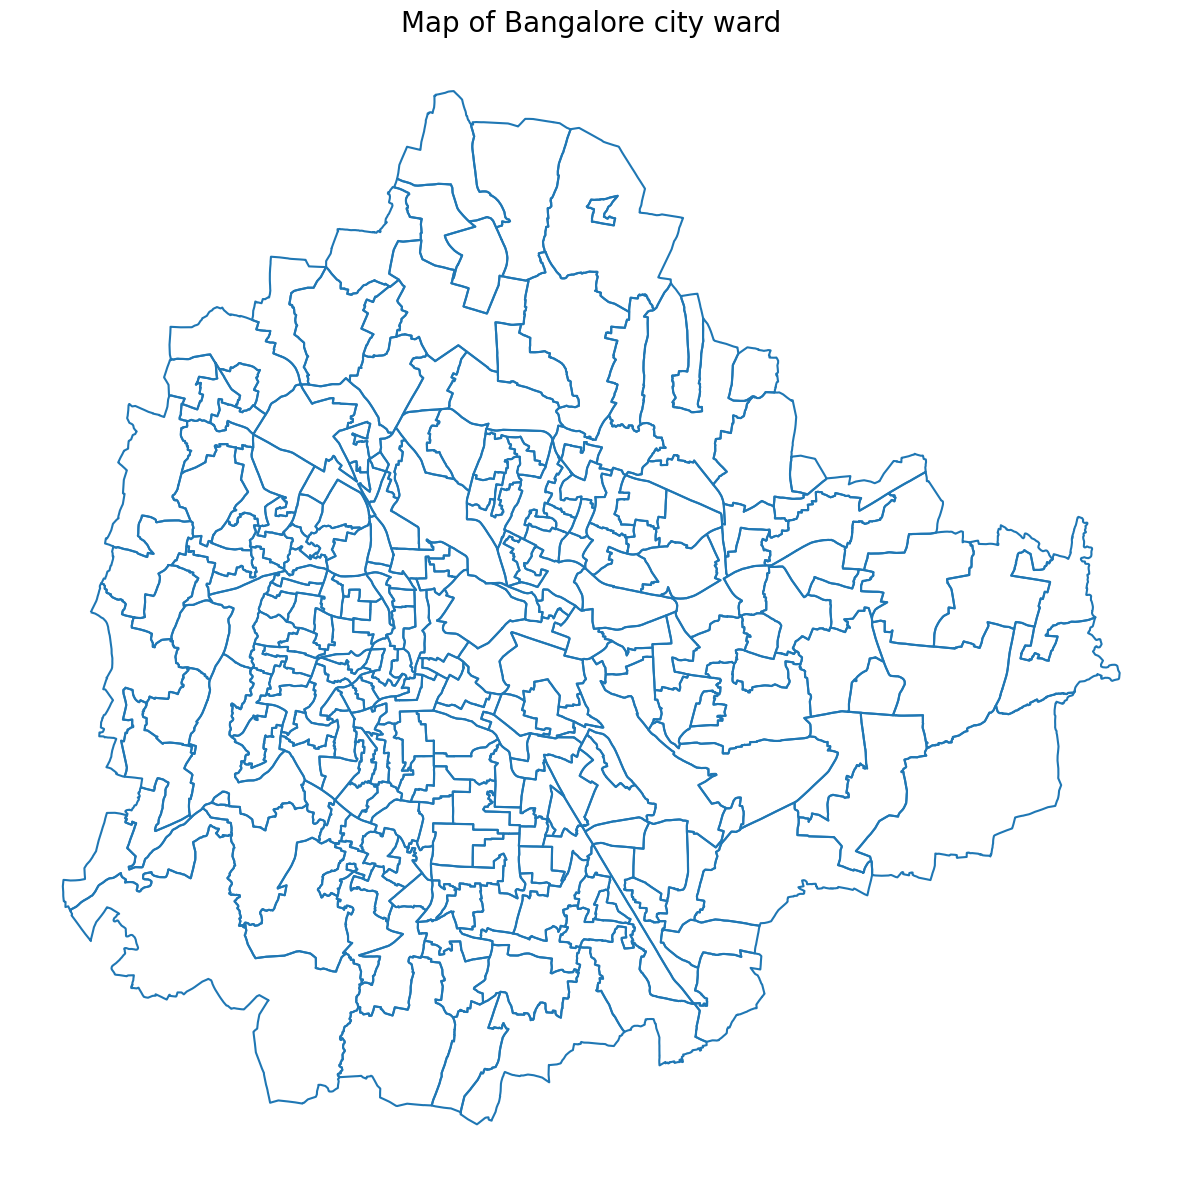

In [24]:
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(15, 15))
ax.axis('off')
ax.set_title('Map of Bangalore city ward', fontdict={'fontsize': 20, 'fontweight': 10})
# Plot the boundary of Karnataka
bdf.boundary.plot(ax=ax)

#bdf['centroid'] = bdf['geometry'].centroid

# Add labels for each district
#for i, row in bdf.iterrows():
    #plt.text(row['centroid'].x, row['centroid'].y, row['KGISWardName'], size=10)

plt.show()

In [95]:
highways_df = gpd.read_file('karnataka_highway.shp')

In [97]:
highways_df

,geometry
0,"LINESTRING (74.01432 15.15677, 74.01431 15.156..."
1,"LINESTRING (73.97357 15.16538, 73.97397 15.171..."
2,"LINESTRING (73.97861 15.21875, 73.97836 15.219..."
3,"LINESTRING (73.97732 15.27271, 73.97784 15.273..."
4,"LINESTRING (73.97770 15.27750, 73.97757 15.276..."
...,...
35973,"LINESTRING (78.63950 13.29870, 78.62440 13.321..."
35974,"LINESTRING (78.56940 13.77970, 78.56310 13.788..."
35975,"LINESTRING (78.53992 13.61348, 78.55930 13.64020)"
35976,"LINESTRING (78.58467 13.63346, 78.57155 13.637..."


In [53]:
railways_df = gpd.read_file('INDIAN_RAILWAYS.geojson')

In [56]:
railways_df.nunique()

ID            29947
TRK_NME          82
FTR_CRY           4
CITY_NME       2571
STT_NME          29
SHAPE_Leng    29947
geometry      29946
dtype: int64

In [91]:
bounds = bdf.total_bounds
bounds
#returns a NumPy array with the following values: [minx, miny, maxx, maxy]
xmin, xmax, ymin, ymax = bounds[0], bounds[2] , bounds[1], bounds[3]

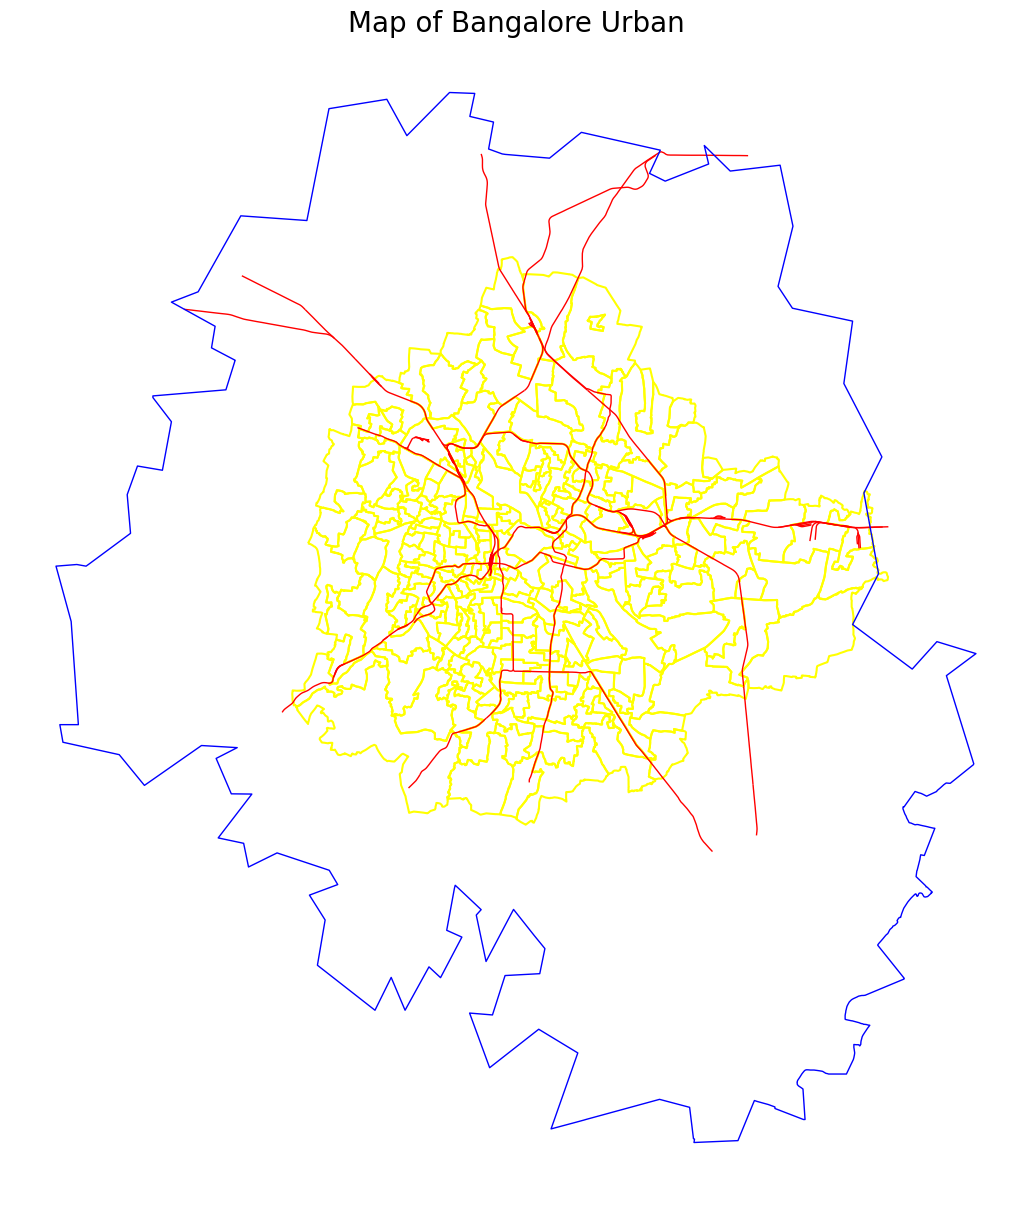

In [104]:
# Create a map canvas
fig, ax = plt.subplots(figsize=(15, 15))
ax.axis('off')
ax.set_title('Map of Bangalore Urban', fontdict={'fontsize': 20, 'fontweight': 10})
# Plot the second shapefile
bdf.boundary.plot(ax=ax, color='yellow', label='outline')

## limiting coordinates
filtered_gdf = railways_df.cx[xmin:xmax, ymin:ymax]
filtered_gdf2 = KA_df[KA_df['district'] == 'Bengaluru']
filtered_gdf3 = highways_df.cx[xmin:xmax, ymin:ymax]
# Plot the road network
filtered_gdf.plot(ax=ax, linewidth=1, color='red', label='Railways')
filtered_gdf2.boundary.plot(ax=ax, linewidth=1, color='blue', label='Highways')


# Show the map
plt.show()

#### Another Dataset ---> Need Lot of Cleaning

In [106]:
# dataset taken from Kaggle: year 2018
df2 = pd.read_csv('Bengaluru_House_Data.csv')
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df2.shape

(13320, 9)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [117]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [118]:
# Change column values with 1 for 'Ready To Move' and 0 for other values
df2['availability'] = df2['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [119]:
df2['availability'].value_counts()

availability
1    10581
0     2739
Name: count, dtype: int64

In [120]:
# Use regular expressions to extract numbers from the "size" column
df2['size'] = df2['size'].str.extract(r'(\d+)')

# Convert the extracted numbers to numeric values (optional)
df2['size'] = pd.to_numeric(df2['size'], errors='coerce')


In [121]:
# counting null fields in each column
df2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [125]:
df2['total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [126]:
# Define a custom function to convert numeric values to numbers
def convert_to_number(value):
    try:
        # Attempt to convert the value to a float
        return float(value)
    
    except (ValueError, TypeError):
        print(value)
        return value

# Apply the custom function to the DataFrame column
df2['total_sqft'] = df2['total_sqft'].apply(convert_to_number)

2100 - 2850
3010 - 3410
2957 - 3450
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
1520 - 1740
34.46Sq. Meter
1195 - 1440
1200 - 2400
4125Perch
1120 - 1145
4400 - 6640
3090 - 5002
4400 - 6800
1160 - 1195
1000Sq. Meter
4000 - 5249
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
3606 - 5091
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
1440 - 1884
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
660 - 670
4000 - 5249
1500Sq. Meter
620 - 933
142.61Sq. Meter
2695 - 2940
2000 - 5634
1574Sq. Yards
3450 - 3472
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2249.81 - 4112.19
3436 - 3643
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
1200 - 2400
1500 - 2400
117Sq. Yards
934 - 1437
980 - 1030
1564 - 1850
1446 - 1506
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
1430 - 1630
704 - 730
1482 - 1846
2805 - 3565
3293 - 5314
1210 - 1477
3369 - 3464
1125 - 1500
167S

#### Geocoding using opencage api request

In [18]:
from opencage.geocoder import OpenCageGeocode

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '809f2d09f930433797f70db14fb40254'
geocoder = OpenCageGeocode(api_key)

In [50]:
# Address to geocode
address = "1600 Amphitheatre Parkway, Mountain View, CA"

# Perform geocoding
result = geocoder.geocode(address)

if result and len(result):
    # Extract latitude and longitude from the first result
    latitude = result[0]['geometry']['lat']
    longitude = result[0]['geometry']['lng']
    print(f"Geocoded coordinates: Latitude {latitude}, Longitude {longitude}")
else:
    print("Geocoding failed.")

Geocoded coordinates: Latitude 37.4217636, Longitude -122.084614
